In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Actors

We want to load a table with gross income and number of movies

In [2]:
actors = Table().read_table("actors.csv")
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


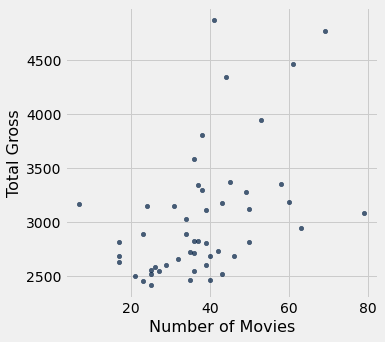

In [3]:
actors.scatter("Number of Movies", "Total Gross")
# should look like a positive trend

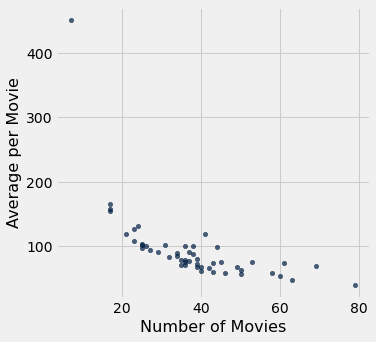

In [4]:
actors.scatter("Number of Movies","Average per Movie")
# should look like a negative trend

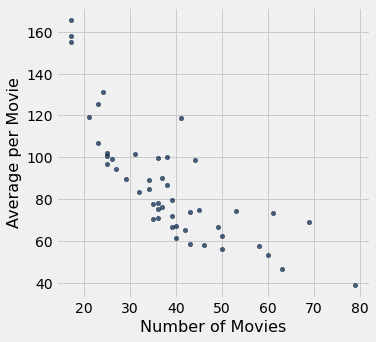

In [5]:
#there seems to be an outlier
# let's remove it
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')


In [6]:
# who are the busiest actors in Hollywood?
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [7]:
# who was the outlier?
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [8]:
movies_by_year = Table().read_table("movies_by_year.csv")
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


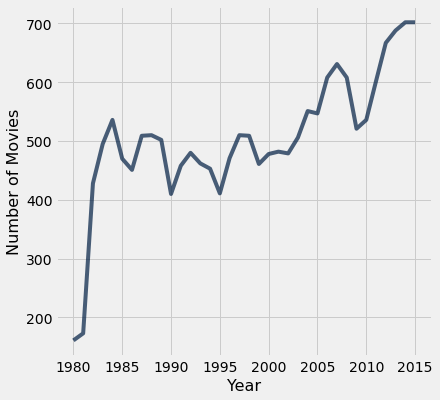

In [9]:
movies_by_year.plot("Year", "Number of Movies")

The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year. 

The sharp rise in the early 1980’s is due in part to studios returning to the forefront of movie production after some years of filmmaker driven movies in the 1970’s.

Our focus will be on more recent years.

In [10]:
century_21 = movies_by_year.where('Year', are.above(1999))

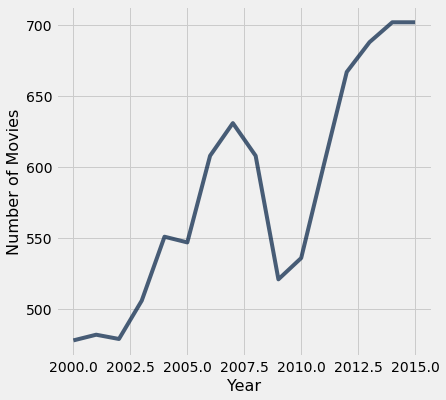

In [11]:
century_21.plot('Year', 'Number of Movies')

The global financial crisis of 2008 has a visible effect

But they still kept making more money!!!

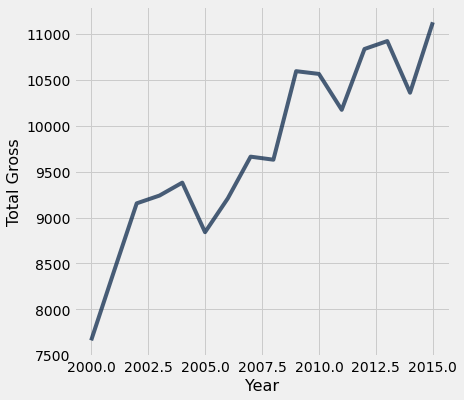

In [13]:
century_21.plot('Year', 'Total Gross')

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession. “In Downturn, Americans Flock to the Movies,” said the New York Times in February 2009

Also sometimes one movie can make a big difference.

In [14]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


In [9]:
movie_cat = Table().read_table("movie_cat.csv")
movie_cat

Kind,Number
Stream,71
Broadcast,6
Physical,6
Theater,15


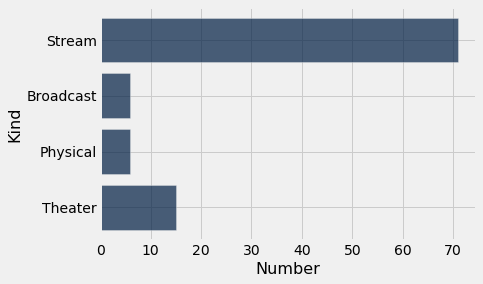

In [10]:
movie_cat.barh("Kind", "Number")

In [ ]:
# NOW MAKE ONE FROM THE CLASS - AND COMPARE THEM.

In [15]:
top = Table().read_table("top_movies.csv")
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


The Table method group allows us to count how frequently each studio appears in the table, by calling each studio a category and collecting all the rows in each of these new categories.

The group method takes as its argument the label of the column that contains the categories. It returns a table of counts of rows in each category.

Thus group creates a distribution table that shows how the individuals (movies) are distributed among the categories (studios).

The group method lists the categories in ascending order. Since our categories are studio names and therefore represented as strings, ascending order means alphabetical order.



In [16]:
movies_by_studio = top.group("Studio")
movies_by_studio

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


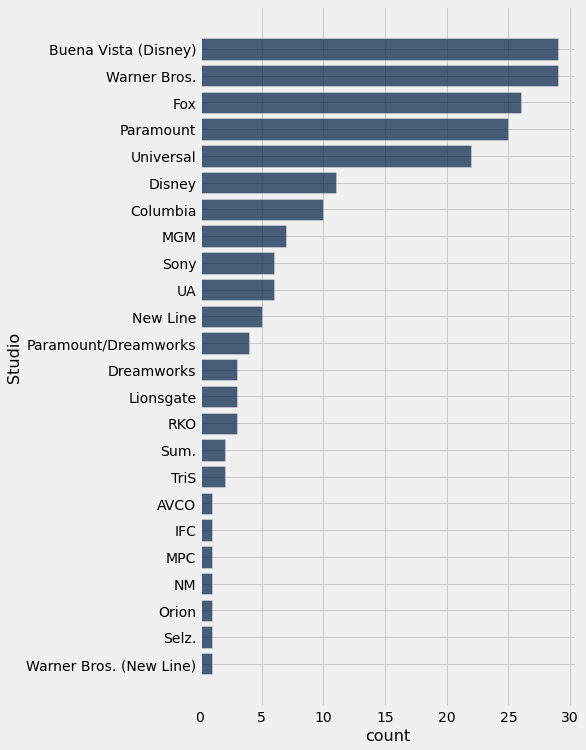

In [17]:
movies_by_studio.sort("count", descending=True).barh("Studio", "count")

## Towards Quantitative variables
we could treat the year of release as a categorical variable and plot the its distribution.

for every year we could find how many movies were released that year, and then draw the bar chart of that distribution

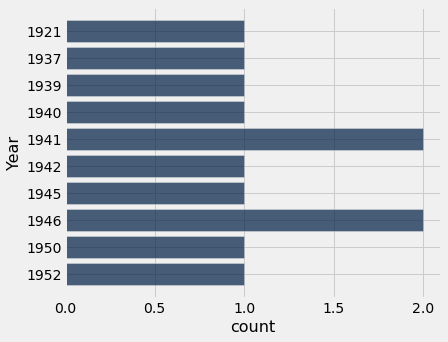

In [19]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').take(np.arange(10)).barh('Year')

The years appear in increasing order because group sorts the categories from lowest to highest

## Visualizing Numerical Distributions

Many of the variables that data scientists study are quantitative or numerical.

The first column contains the title of the movie. 

The second column contains the name of the studio that produced the movie. 

The third contains the domestic box office gross in dollars, and the fourth contains the gross amount that would have been earned from ticket sales at 2016 prices. 

The fifth contains the release year of the movie.



In [20]:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [23]:
millions = top.select(0).with_columns('Adjusted Gross', np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


There is likey to be only one movie for each Adjusted Gross value, since the numbers are so specific to the dollar.

A better way of looking at this would be to BIN the values into intervals, AKA "binning"

The bin method takes as its argument a column label or index, and an optional argument in which you can specify the bins that you want.



To choose some bins, we will start by looking at the smallest and largest values of Adjusted Gross

In [24]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(322.26, 1757.79)

Let’s try bins of width 100, starting at 300 and going to 2000

In [26]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


If you don’t specify any bins, the default is to produce 10 equally wide bins between the minimum and maximum values of the data.

This is often useful for getting a quick sense of the distribution, but the endpoints of the bins tend to be alarming.



In [28]:
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
322.26,112
465.813,52
609.366,15
752.919,10
896.472,3
1040.03,4
1183.58,2
1327.13,0
1470.68,1
1614.24,1


You can specify a number of equally wide bins. For example, the option bins=4 leads to 4 equally spaced bins.

In [29]:
millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
322.26,174
681.142,18
1040.03,6
1398.91,2
1757.79,0


We will look at visualizing these numerical distrubitions when we cover histograms.